
At bond length of H2_sto-3g_singlet_0.62 angstrom, 0.62 has:
Hartree-Fock energy of -1.1069303676814266 Hartree.
MP2 energy of -1.117513852721969 Hartree.
CCSD energy of -1.12276717160584 Hartree.
Nuclear repulsion energy between protons is 0.8535116267580645 Hartree.
Spatial orbital 0 has energy of -0.6314320327346239 Hartree.
Spatial orbital 1 has energy of 0.8112804685515107 Hartree.

At bond length of H2_sto-3g_singlet_0.64 angstrom, 0.64 has:
Hartree-Fock energy of -1.1112981945871385 Hartree.
MP2 energy of -1.122274369203941 Hartree.
CCSD energy of -1.1278421335924262 Hartree.
Nuclear repulsion energy between protons is 0.8268393884218749 Hartree.
Spatial orbital 0 has energy of -0.6221690694263743 Hartree.
Spatial orbital 1 has energy of 0.7855211039350056 Hartree.

At bond length of H2_sto-3g_singlet_0.66 angstrom, 0.6599999999999999 has:
Hartree-Fock energy of -1.1143965388510355 Hartree.
MP2 energy of -1.1257783104143209 Hartree.
CCSD energy of -1.1316763408911954 Hartree.
N

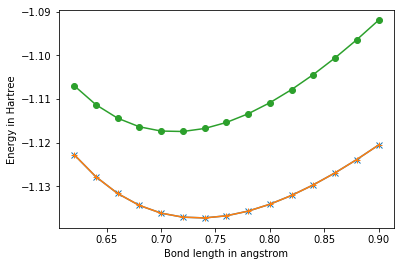

In [2]:
# capture output to object to display later
# so that notebook can be closed and then output seen later
# %%capture printed_output

from openfermion.hamiltonians import MolecularData
from openfermionpsi4 import run_psi4

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
bond_length_interval = 0.02
n_points = 15

# Set file parameters.
delete_input = True
delete_output = True

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
ccsd_energies = []
bond_lengths = []

scf=True
mp2=True
cisd=False
ccsd=True
fci=True

for point in range(1, n_points + 1):
    bond_length = 0.6+bond_length_interval * float(point)
    bond_lengths += [bond_length]
    geometry = [('H', (0., 0., 0.)), 
                ('H', (0., 0., bond_length)),]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run Psi4.
    molecule = run_psi4(molecule, scf, mp2, cisd, ccsd, fci)                
    
    # Print out some results of calculation.
    print('\nAt bond length of {} angstrom, {} has:'.format(molecule.name, bond_length))
    print('Hartree-Fock energy of {} Hartree.'.format(molecule.hf_energy))
    print('MP2 energy of {} Hartree.'.format(molecule.mp2_energy))
    print('CCSD energy of {} Hartree.'.format(molecule.ccsd_energy))
    print('Nuclear repulsion energy between protons is {} Hartree.'.format(
        molecule.nuclear_repulsion))
    for orbital in range(molecule.n_orbitals):
        print('Spatial orbital {} has energy of {} Hartree.'.format(
            orbital, molecule.orbital_energies[orbital]))
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]
    ccsd_energies += [molecule.ccsd_energy]

# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, ccsd_energies, '+-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.show()

In [1]:
# printed_output.show()
print(molecule.n_orbitals)


NameError: name 'molecule' is not defined

In [8]:
print(molecule.filename)

/store/DAMTP/ss2310/anaconda3/lib/python3.6/site-packages/openfermion/data/H2_cc-pVDZ_singlet_0.9


In [2]:
from projectq.ops import QubitOperator
from openfermion.ops import FermionOperator

from openfermion.hamiltonians import MolecularData
from openfermion.transforms import get_fermion_operator, jordan_wigner

def my_jordan_wigner(fermion_op):
    qubit_op = jordan_wigner(fermion_op)
    good_qop = QubitOperator()
    for term in qubit_op.terms:
        good_qop += QubitOperator(term, qubit_op.terms[term])
    return good_qop


molecule = MolecularData(filename='/store/DAMTP/ss2310/anaconda3/lib/python3.6/site-packages/openfermion/data/H2_cc-pVDZ_singlet_0.8')
# two_electron_integrals = n2_molecule.two_body_integrals

# ccsd_singles_amps = n2_molecule.ccsd_double_amps
# print(ccsd_singles_amps)

molecule_qubit_hamiltonian = my_jordan_wigner(get_fermion_operator(molecule.get_molecular_hamiltonian()))
print(molecule_qubit_hamiltonian)


(27.270222276723775+0j) I +
(-1.9196670243734297+0j) Z0 +
(0.41765037313877823+0j) Y0 Z1 Z2 Z3 Y4 +
(0.41765037313877823+0j) X0 Z1 Z2 Z3 X4 +
(-0.0711326258447138+0j) Y0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Y12 +
(-0.0711326258447138+0j) X0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 X12 +
(-1.91966702437343+0j) Z1 +
(0.4176503731387781+0j) Y1 Z2 Z3 Z4 Y5 +
(0.4176503731387781+0j) X1 Z2 Z3 Z4 X5 +
(-0.0711326258447138+0j) Y1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Y13 +
(-0.0711326258447138+0j) X1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 X13 +
(-1.4721872497558157+0j) Z2 +
(0.39614118803950615+0j) Y2 Z3 Z4 Z5 Y6 +
(0.39614118803950615+0j) X2 Z3 Z4 Z5 X6 +
(-0.0004263713518337039+0j) Y2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Z13 Z14 Z15 Z16 Z17 Y18 +
(-0.0004263713518337039+0j) X2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Z13 Z14 Z15 Z16 Z17 X18 +
(-1.4721872497558155+0j) Z3 +
(0.3961411880395062+0j) Y3 Z4 Z5 Z6 Y7 +
(0.3961411880395062+0j) X3 Z4 Z5 Z6 X7 +
(-0.0004263713518337023+0j) Y3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Z13

In [1]:
import numpy as np
from openfermion.hamiltonians import MolecularData

# from openfermion/utils/_unitary_cc.py
def uccsd_convert_amplitude_format(single_amplitudes, double_amplitudes):
    """Re-format single_amplitudes and double_amplitudes from ndarrays to lists.
    Args:
        single_amplitudes(ndarray): [NxN] array storing single excitation
            amplitudes corresponding to t[i,j] * (a_i^\dagger a_j - H.C.)
        double_amplitudes(ndarray): [NxNxNxN] array storing double
            excitation amplitudes corresponding to
            t[i,j,k,l] * (a_i^\dagger a_j a_k^\dagger a_l - H.C.)
    Returns:
        single_amplitudes_list(list): list of lists with each sublist storing
            a list of indices followed by single excitation amplitudes
            i.e. [[[i,j],t_ij], ...]
        double_amplitudes_list(list): list of lists with each sublist storing
            a list of indices followed by double excitation amplitudes
            i.e. [[[i,j,k,l],t_ijkl], ...]
    """
    single_amplitudes_list, double_amplitudes_list = [], []

    for i, j in zip(*single_amplitudes.nonzero()):
        single_amplitudes_list.append([[i, j], single_amplitudes[i, j]])

    for i, j, k, l in zip(*double_amplitudes.nonzero()):
        double_amplitudes_list.append([[i, j, k, l],
                                      double_amplitudes[i, j, k, l]])
    return single_amplitudes_list, double_amplitudes_list

folder = '/store/DAMTP/ss2310/anaconda3/lib/python3.6/site-packages/openfermion/data/'
molecular_details = 'H2_sto-3g_singlet_'
file_i = folder + molecular_details + str(0.8)
molecule = MolecularData(filename=file_i)

single_amplitudes = molecule.ccsd_single_amps
double_amplitudes = molecule.ccsd_double_amps


theta = np.hstack([single_amplitudes.flatten(), double_amplitudes.flatten()])
just_max = np.amax(theta)
t_max = np.amax([abs(x) for x in theta])
print('Largest amplitude of all in magnitude: {}'.format(t_max))
print('Largest amplitude with sign: {}'.format(just_max))


print('Array of sigles amplitude: {}'.format(single_amplitudes.shape))
print('Array of doubles amplitude: {}'.format(double_amplitudes.shape))
print('Sum of singles amplitudes: {}'.format(single_amplitudes.sum()))
print('Sum of doubles amplitudes: {}'.format(double_amplitudes.sum()))
ccsd_single_summer = np.absolute(single_amplitudes)
ccsd_double_summer = np.absolute(double_amplitudes)
print('Sum of absolute values of singles amplitudes: {}'.format(ccsd_single_summer.sum()))
print('Sum of absolute values of doubles amplitudes: {}'.format(ccsd_double_summer.sum()))

# now convert to lists for processing the cluster operator

single_amplitudes, double_amplitudes = uccsd_convert_amplitude_format(
            single_amplitudes, double_amplitudes)

print('Number of non-zero singles amplitudes: {}'.format(len(single_amplitudes)))
print('Number of non-zero doubles amplitudes: {}'.format(len(double_amplitudes)))

print('Number of electrons and qubits (spatial orbitals): {} and {}'.format(molecule.n_electrons, molecule.n_qubits))
# np.savetxt('N2_cc-pVDZ.CCSD-singles-amps', single_amplitudes)


# with open('N2_cc-pVDZ.CCSD-singles-amps', 'w') as f:
#     for item in single_amplitudes:
#         f.write("%s\n" % item)
        
# with open('N2_cc-pVDZ.CCSD-doubles-amps', 'w') as f:
#     for item in double_amplitudes:
#         f.write("%s\n" % item)


Largest amplitude of all in magnitude: 0.0630928757
Largest amplitude with sign: 0.0
Array of sigles amplitude: (4, 4)
Array of doubles amplitude: (4, 4, 4, 4)
Sum of singles amplitudes: 0.0
Sum of doubles amplitudes: -0.1261857514
Sum of absolute values of singles amplitudes: 0.0
Sum of absolute values of doubles amplitudes: 0.1261857514
Number of non-zero singles amplitudes: 0
Number of non-zero doubles amplitudes: 2
Number of electrons and qubits (spatial orbitals): 2 and 4


In [7]:
from projectq.ops import QubitOperator
from openfermion.ops import FermionOperator
from openfermion.transforms import jordan_wigner
from projectq import MainEngine
import numpy as np

def jordan_wigner_singles(p, q, coefficient=1.):
    """
    Map the term a^\dagger_p a_q to QubitOperator.
    Care only about CCS terms - so p != q always
    """
    qubit_operator = QubitOperator()
    a, b = sorted([p, q])
    parity_string = tuple((z, 'Z') for z in range(a + 1, b))
    for operator in ['X', 'Y']:
        operators = ((a, operator),) + parity_string + ((b, operator),)
        qubit_operator += QubitOperator(operators, .5 * coefficient)

    return qubit_operator

def jordan_wigner_CCS(operator):
    """ Apply the Jordan-Wigner transform to a CCS term
    Operators are mapped as follows:
    a_j^\dagger -> Z_0 .. Z_{j-1} (X_j - iY_j) / 2
    a_j -> Z_0 .. Z_{j-1} (X_j + iY_j) / 2
    Returns:
        transformed_operator: An instance of the QubitOperator class.
    Warning:
        The runtime of this method is exponential in the maximum locality
        of the original FermionOperator.
    """
    transformed_operator = QubitOperator()
    for term in operator.terms:

        # Initialize identity matrix.
        transformed_term = QubitOperator((), operator.terms[term])
        transformed_term_x = QubitOperator((), operator.terms[term])
        transformed_term_y = QubitOperator((), operator.terms[term])
        
        x_terms = []
        y_terms = []
    
        # Loop through operators, transform and multiply.
        for ladder_operator in term:
            print('\n ladder_operator')
            print(ladder_operator)
            print('\n range of ladder_operator[0], and operator')
            print(range(ladder_operator[0]))
            print(ladder_operator[0])
            z_factors = tuple((index, 'Z') for
                              index in range(ladder_operator[0]))
            pauli_x_component = QubitOperator(
                z_factors + ((ladder_operator[0], 'X'),), 0.5)
            # if annihilation operator, need X-iY
            if ladder_operator[1]:
                pauli_y_component = QubitOperator(
                    z_factors + ((ladder_operator[0], 'Y'),), -0.5j)
            # if creation operator, X+iY
            else:
                pauli_y_component = QubitOperator(
                    z_factors + ((ladder_operator[0], 'Y'),), 0.5j)
            
            for temp in final_terms:
                xx = []
                xy = []
                xx += [temp*pauli_x_component]
                xy += [temp*pauli_y_component]
                
                yx = []
                yy = []
                yx += [temp*pauli_x_component]
                yy += [temp*pauli_y_component]
            final_terms = xx+xy+yx+yy
                 
            transformed_term *= pauli_x_component + pauli_y_component
            x_terms += [transformed_term_x]
            y_terms += [transformed_term_y]
#             print('\n X component:')
#             print(pauli_x_component)
#             print('\n Y component:')
#             print(pauli_y_component)
#             print('\n transformed term X:')
#             print(transformed_term_x)
#             print('\n transformed term Y:')
#             print(transformed_term_y)
#             print('\n transformed term:')
#             print(transformed_term)
        transformed_operator += transformed_term
#     print('\n the x-component')
    print(x_terms)

    return transformed_operator

eng = MainEngine()
test_reg = eng.allocate_qureg(3)

qubit_identity = QubitOperator("", 1.0)

fermion_identity = FermionOperator.identity()

fermion_op = FermionOperator('3^ 1')

print('\n Fermion Operator')
print(fermion_op)

qubit_op = jordan_wigner(fermion_op)
print('\n Qubit operator')
print(qubit_op)

good_qop = qubit_identity
for term in qubit_op.terms:
    good_qop += QubitOperator(term, qubit_op.terms[term])

print('\n I\'m the good_qop:')
print(good_qop)

qubit_op_term = QubitOperator('X0 Z2', 1.0)
print(type(qubit_op_term))
qubit_op_term | test_reg

print(type(good_qop))
good_qop += qubit_identity
print('\n Qubit operator + 1')
print(qubit_op)


# print('\n Fermion Operator + 1')
# print(fermion_op)


# tester = jordan_wigner_singles(3,1)
# print('\n JW_Singles tester:')
# print(tester)

lcu = []
coefts = []
for term in qubit_op.terms:
    print(qubit_op.terms[term])
    coeft = qubit_op.terms[term]/abs(qubit_op.terms[term])
    lcu += [QubitOperator(term, coeft)]
    coefts += [qubit_op.terms[term]]
print('\n this is now our list of operators of length {}'.format(len(qubit_op.terms)))
print(lcu)
print('\n with coefficients')
print(coefts)
print('\n compare to qubit_op_term')
print(qubit_op_term)

single_amps = [[[1,2], 1.0]]
double_amps = [[[10,2,32,4], 1.0]]
this = (single_amps, double_amps)
print(this)

for [i,j,k,l],c in double_amps:
    i,j,k,l = sorted([i,j,k,l])
    print(i)
    print(j)
    print(k)
    print(l)
    print(c)
coefts = [0.25*c for x in range(5)]
coefts = np.concatenate(([1.0], coefts))
print(coefts)
coefts = np.concatenate((coefts, np.zeros(5)))
print(coefts)
print(len(coefts))

i, j = sorted((110,22))
print(i)

amps = np.array([[0,0,0],
       [0,0,0],
       [0,0,0]])


for i, j in zip(*amps.nonzero()):
    print('I am in an empty loop')


 Fermion Operator
1.0 [3^ 1]

 Qubit operator
(0.25+0j) [X1 Z2 X3] +
-0.25j [X1 Z2 Y3] +
0.25j [Y1 Z2 X3] +
(0.25+0j) [Y1 Z2 Y3]

 I'm the good_qop:
1.0 I +
0.25j Y1 Z2 X3 +
(0.25+0j) X1 Z2 X3 +
(0.25+0j) Y1 Z2 Y3 +
-0.25j X1 Z2 Y3
<class 'projectq.ops._qubit_operator.QubitOperator'>
<class 'projectq.ops._qubit_operator.QubitOperator'>

 Qubit operator + 1
(0.25+0j) [X1 Z2 X3] +
-0.25j [X1 Z2 Y3] +
0.25j [Y1 Z2 X3] +
(0.25+0j) [Y1 Z2 Y3]
0.25j
(0.25+0j)
(0.25+0j)
-0.25j

 this is now our list of operators of length 4
[1j Y1 Z2 X3, (1+0j) X1 Z2 X3, (1+0j) Y1 Z2 Y3, -1j X1 Z2 Y3]

 with coefficients
[0.25j, (0.25+0j), (0.25+0j), -0.25j]

 compare to qubit_op_term
1.0 X0 Z2
([[[1, 2], 1.0]], [[[10, 2, 32, 4], 1.0]])
2
4
10
32
1.0
[ 1.    0.25  0.25  0.25  0.25  0.25]
[ 1.    0.25  0.25  0.25  0.25  0.25  0.    0.    0.    0.    0.  ]
11
22


In [1]:
from PyGMO.problem import base

ModuleNotFoundError: No module named 'PyGMO'

In [2]:
import PyGMO

ModuleNotFoundError: No module named 'PyGMO'

In [3]:
import pygmo